In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None,names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "type"])

In [3]:
import numpy as np

In [4]:
data

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
data.shape


(214, 11)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
data[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]].describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [8]:
data.drop(["Id"], axis=1, inplace=True)

In [9]:
data.isnull().any().any()


False

In [10]:
import seaborn as sn

In [11]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Distribution of glass type')

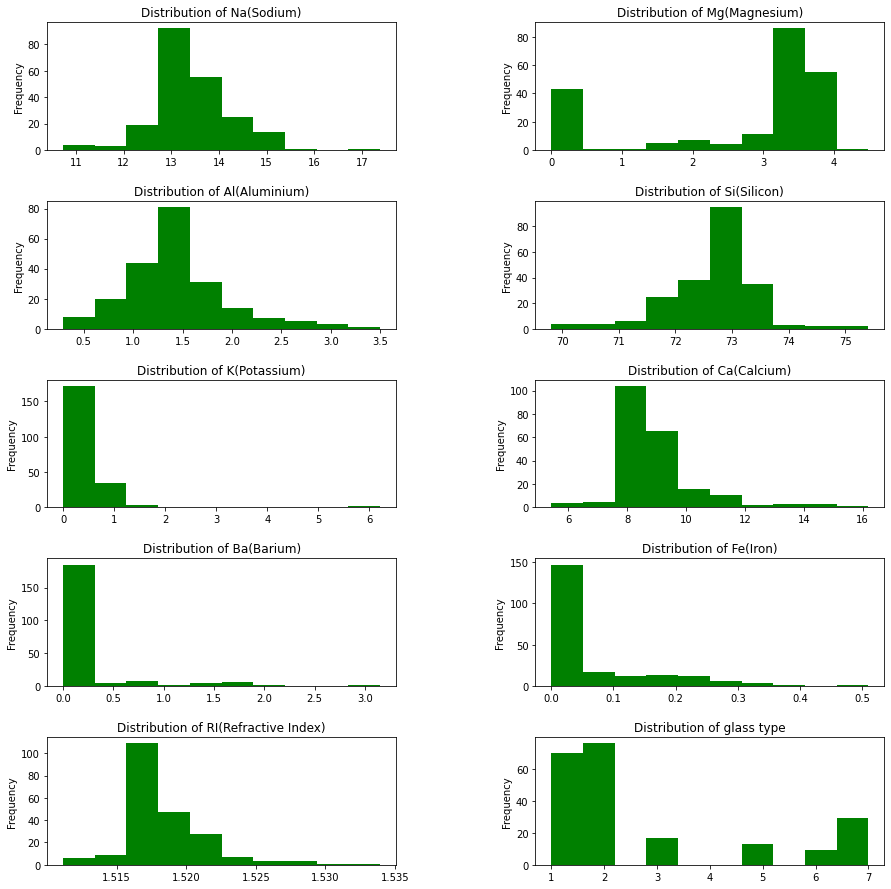

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)


plt.subplot(5, 2, 1,)
plt.subplots_adjust(bottom=0.1)
data['Na'].plot(kind='hist',color='green',figsize=(15,15))
plt.title("Distribution of Na(Sodium)")



plt.subplot(5, 2, 2)
data['Mg'].plot(kind='hist' ,color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Mg(Magnesium)")




plt.subplot(5, 2, 3)
data['Al'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Al(Aluminium)")


plt.subplot(5, 2, 4)
data['Si'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Si(Silicon)")


plt.subplot(5, 2, 5)
data['K'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of K(Potassium)")




plt.subplot(5, 2, 6)
plt.subplots_adjust(bottom=0.1)
data['Ca'].plot(kind='hist',color='green',figsize=(15,15))
plt.title("Distribution of Ca(Calcium)")



plt.subplot(5, 2, 7)
data['Ba'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Ba(Barium)")



plt.subplot(5, 2, 8)
data['Fe'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Fe(Iron)")


plt.subplot(5, 2, 9)
data['RI'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of RI(Refractive Index)")


plt.subplot(5, 2, 10)
data['type'].plot(kind='hist',color='green',figsize=(15,15))


plt.title("Distribution of glass type")

None of the features are normally distributed and some have outliers

Note: Outlier treatment maybe done to check impact on classification

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 9].values

In [14]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

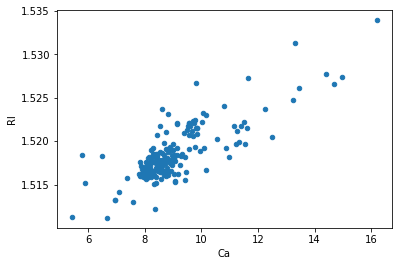

In [15]:
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='Ca',y= 'RI')
plt.show()

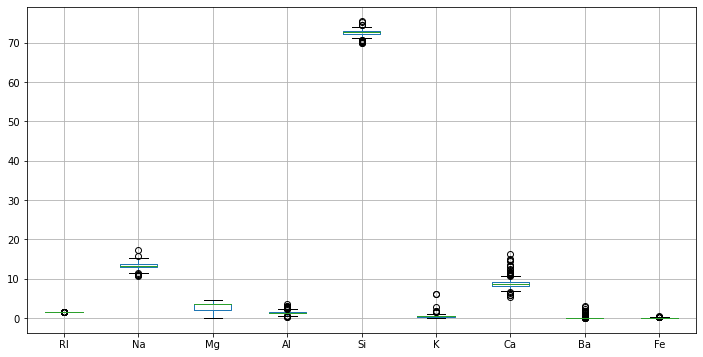

In [16]:
data.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

- Silicon is the main component of Glass making more than 70% of composition
- Combined Silicon, Sodium and Calcium make up around 90%
- Iron is the least important component

prefer to use models without outlier treatment, in many cases it can improve the model performance.
But it also leads to change of information which might alter real/practical situations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

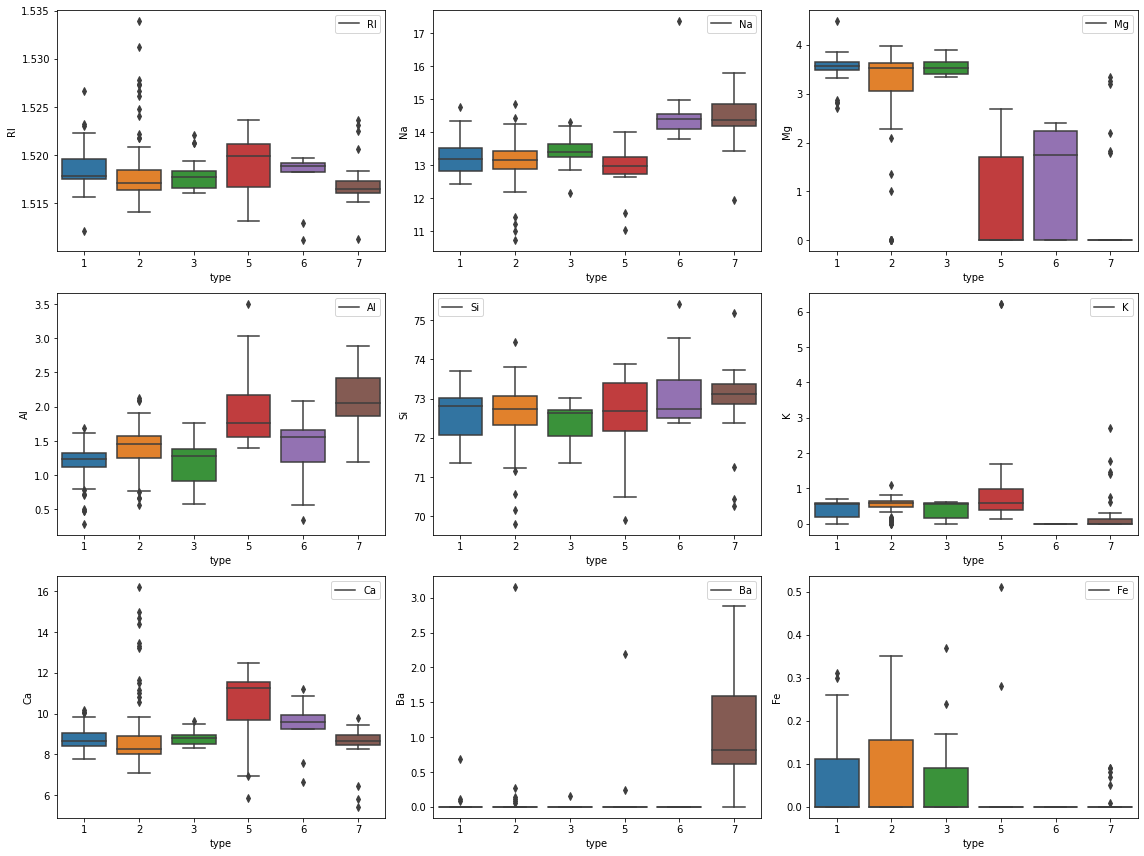

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("type", col, ax = ax[i], data=data)
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

- Refractive index lies between 1.51 and 1.54
- Type 6 and 7 have higher Na %
- Type 1,2 and 3 have higher Mg %
- Type 5 and 7 have higher Al %
- Si % is similar in all types
- Type 6 has no K composition
- Type 5 and 6 have higher Ca composition
- Ba is mostly used in Type 7
- Fe is used in Type 1,2 and 3

In [18]:
from statsmodels.multivariate.manova import MANOVA


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<Figure size 576x576 with 0 Axes>

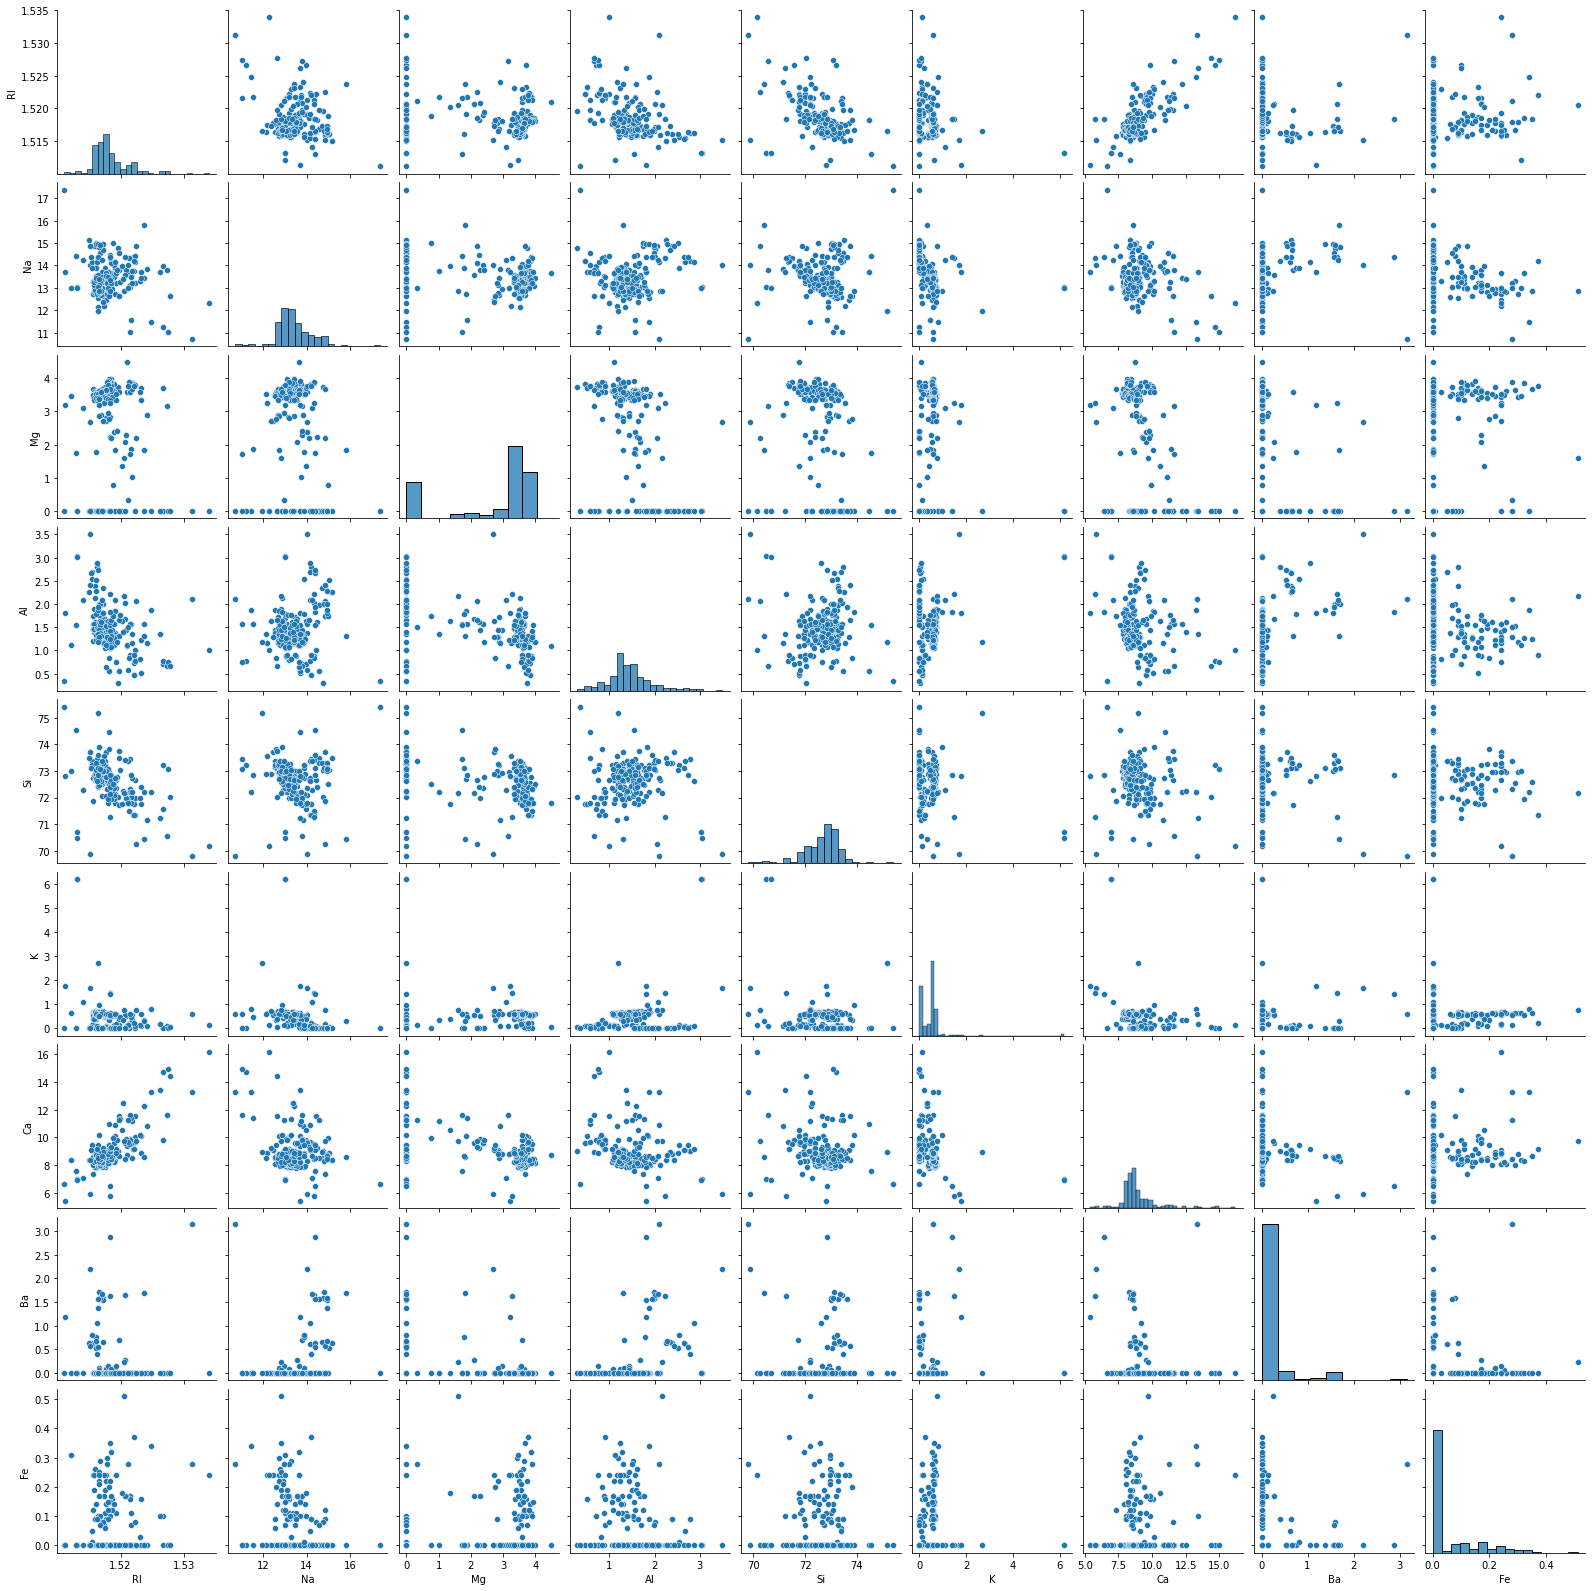

<Figure size 432x288 with 0 Axes>

In [20]:

features = data.columns[:-1].tolist()

plt.figure(figsize = (8,8))
sns.pairplot(data[features],palette = 'coolwarm')
plt.show()
plt.savefig('plot.pdf')

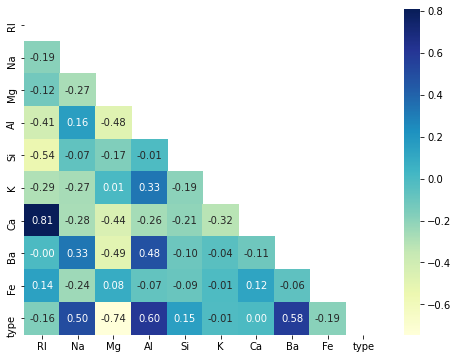

In [21]:
plt.figure(figsize=(8,6))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

K and Ca have no correlation with Type, which means for some type it maybe high for some low causing cancelling effect,so needs to do feature engineering ,for these two and do data smoothning

In [22]:
data.groupby("type")["Ca"].mean()

type
1     8.797286
2     9.073684
3     8.782941
5    10.123846
6     9.356667
7     8.491379
Name: Ca, dtype: float64

In [23]:
data.groupby("type")["K"].mean()


type
1    0.447429
2    0.521053
3    0.406471
5    1.470000
6    0.000000
7    0.325172
Name: K, dtype: float64

In [24]:
data["Ca_morethan9"] = np.where(data["Ca"]>9, 1, 0)
data["K_morethandot7"] = np.where(data["K"]>0.7, 1, 0)
data["K_lessthandot4"] = np.where(data["K"]<0.4, 1, 0)

Manova for new variables

In [25]:
from statsmodels.multivariate.manova import MANOVA
maov=MANOVA.from_formula('K_morethandot7 + K_lessthandot4 + Ca_morethan9 ~ type', data=data)
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9148 3.0000 210.0000  6.5184 0.0003
         Pillai's trace 0.0852 3.0000 210.0000  6.5184 0.0003
 Hotelling-Lawley trace 0.0931 3.0000 210.0000  6.5184 0.0003
    Roy's greatest root 0.0931 3.0000 210.0000  6.5184 0.0003
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          type          Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7105 3.0000 210.0000 28.5233 0.0000
         Pillai's trace 0.2895 3.0000 210.0000 28.5233 0.0000
 Hotelling-Lawley trace 0.

In [26]:
cols.append("Ca_morethan9")
cols.append("K_morethandot7")
cols.append("K_lessthandot4")

ANOVA

ho there is no relatiinship
h1 there is relationship

In [27]:
import statsmodels.api as sm
import statsmodels.stats as sms

for col in cols:
    k = sm.formula.ols(col+"~ type", data=data).fit()
    pval = sms.anova.anova_lm(k)["PR(>F)"][0]
    print(f"Pval for {col}: {pval}")

Pval for RI: 0.01617845580599427
Pval for Na: 4.061873356971206e-15
Pval for Mg: 3.8829946163472014e-39
Pval for Al: 3.26080946946565e-22
Pval for Si: 0.0266199101047075
Pval for K: 0.8837426923094087
Pval for Ca: 0.9889510387030452
Pval for Ba: 3.038430172779663e-20
Pval for Fe: 0.0057293003513817185
Pval for Ca_morethan9: 0.07403949750207843
Pval for K_morethandot7: 0.0001065753630029827
Pval for K_lessthandot4: 2.377474211882503e-09


K and Ca are not siginificant, but the new variables we have created are significant.

In [28]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type,Ca_morethan9,K_morethandot7,K_lessthandot4
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0,0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0,0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1,0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0,0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0,0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0,0,1


In [29]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 9].values

PCA AND MULTIDIMENSIONAL SCALING

In [30]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
x=sc.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
# None means that we are selecting all the principal components. Once again, WE ARE NOT DROPPING ANY VARIABLES.
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Cummulative variance:
 [0.27116939 0.50639455 0.65632781 0.75394941 0.83256405 0.88827605
 0.93065128 0.95951276 0.9800743  0.99479939 0.99986802 1.        ]


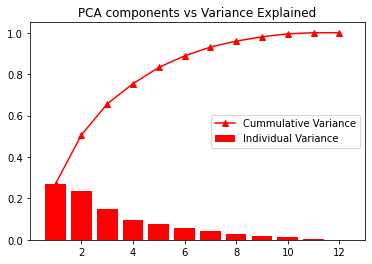

In [32]:
var_exp = pca.explained_variance_ratio_
cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Cummulative variance:\n", cum_var)
plt.plot(range(1, len(var_exp)+1), cum_var, color='r', marker='^', label="Cummulative Variance")
plt.bar(range(1, len(var_exp)+1), var_exp, color='r', label="Individual Variance")
plt.legend(loc='best')
plt.title("PCA components vs Variance Explained")
plt.show()

In [33]:
pca8 = PCA(n_components = 8)
X_pca = pd.DataFrame(pca8.fit_transform(x))
X_pca.head()

,0,1,2,3,4,5,6,7
0,-1.393237,-0.722408,-0.193691,1.748260,-0.249028,0.458711,0.141490,-0.068795
1,-0.033645,-1.355001,-0.548916,0.748311,-0.362001,-0.026242,-0.028750,0.074454
2,0.222088,-1.583651,-0.617296,0.187772,-0.314221,0.135746,-0.228469,-0.300861
3,-0.406832,-1.387548,-0.120180,0.388934,-0.440515,0.415581,-0.044977,0.002432
4,-0.282373,-1.533845,-0.443606,0.032935,-0.470425,0.307144,0.203197,-0.006130


In [34]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [35]:
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(X_pca), columns=X_pca.columns)


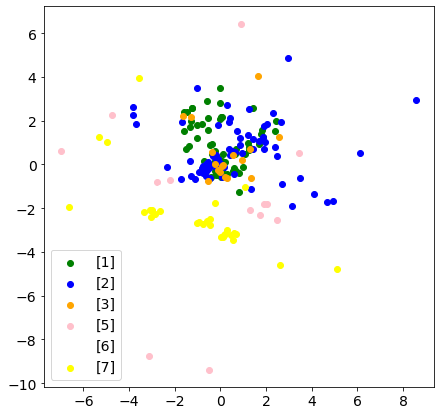

In [36]:
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(x1)
colors = ['red','green','blue','orange','purple','pink','white','yellow']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in np.unique(data['type']):
  subset = X_2d[data['type'] == i]
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label=[i])
plt.legend()
plt.show()


Knearest CLassfier

In [37]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 9].values

In [38]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.25, random_state = None, stratify=y)


ACCURACY : 0.9316770186335404 when neighbors: 1


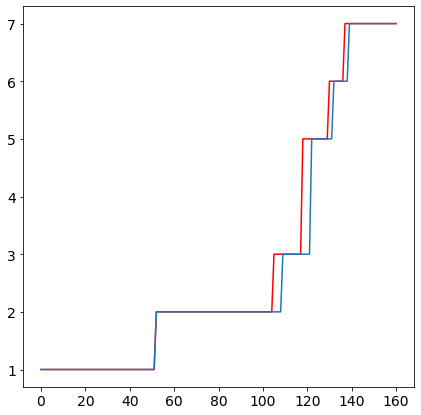

ACCURACY : 0.9130434782608695 when neighbors: 2


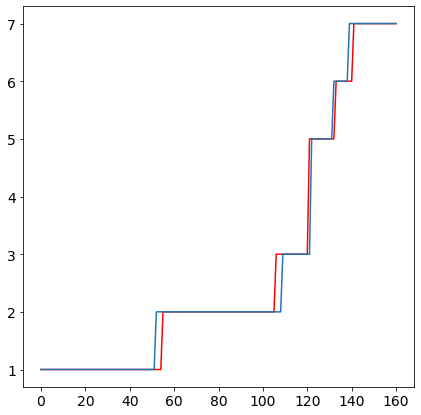

ACCURACY : 0.906832298136646 when neighbors: 3


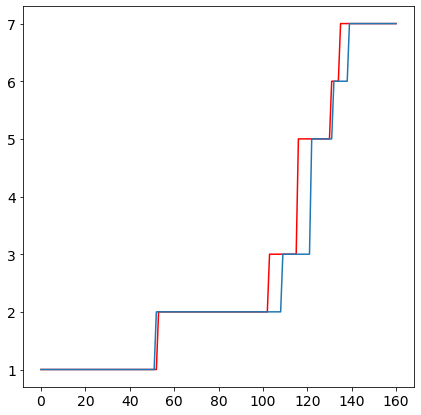

ACCURACY : 0.8695652173913043 when neighbors: 4


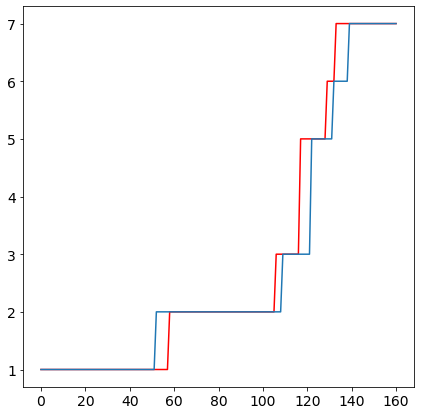

ACCURACY : 0.84472049689441 when neighbors: 5


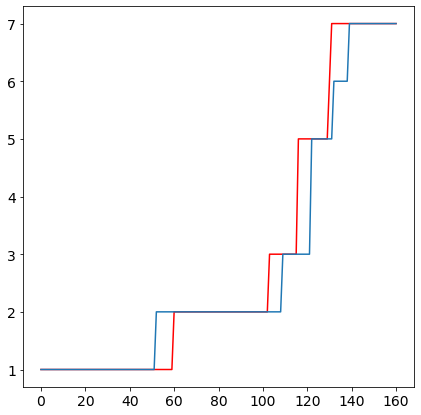

ACCURACY : 0.8260869565217391 when neighbors: 6


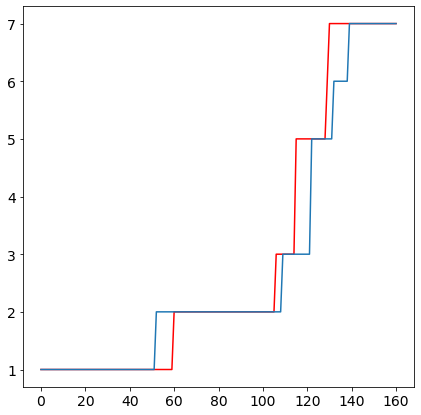

ACCURACY : 0.8322981366459627 when neighbors: 7


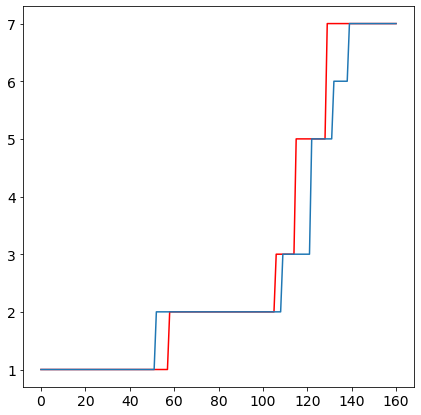

ACCURACY : 0.7453416149068323 when neighbors: 8


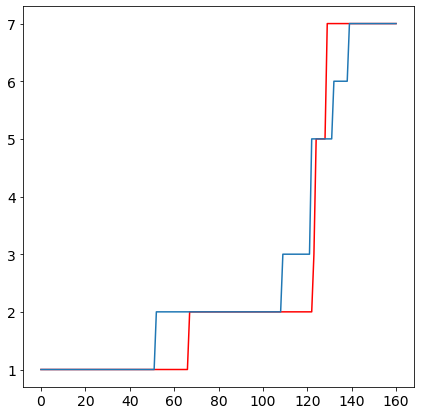

ACCURACY : 0.7453416149068323 when neighbors: 9


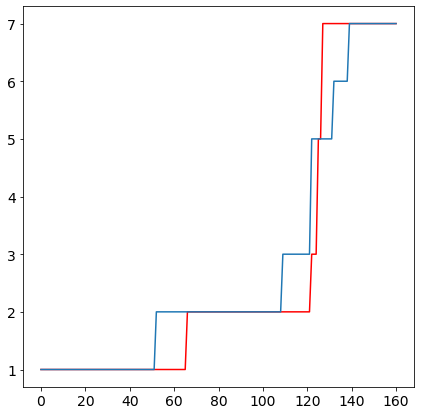

ACCURACY : 0.7204968944099379 when neighbors: 10


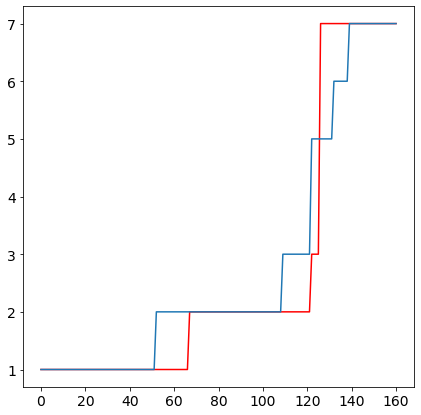

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(1,11): 
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    y_pre=model.predict(xtest)
    acc=accuracy_score(ytest,y_pre)
    print("ACCURACY :",acc,"when neighbors:",i)
    plt.plot(sorted(y_pre),color="red")
    plt.plot(sorted(ytest))
    plt.show()

In [40]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)
y_pre=model.predict(xtest)
acc=accuracy_score(ytest,y_pre)
print("ACCURACY :",acc,"when neighbors:",3)


ACCURACY : 0.906832298136646 when neighbors: 3


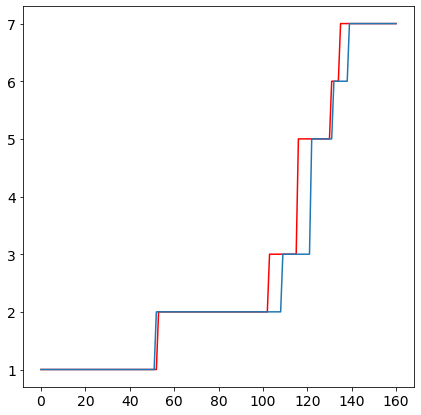

ACCURACY : 0.906832298136646 when neighbors: 3


In [41]:
plt.plot(sorted(y_pre),color="red")
plt.plot(sorted(ytest))
plt.show()
print("ACCURACY :",acc,"when neighbors:",3)